In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import matplotlib.dates as mdates


In [106]:
def data_download(ticker, date, interval):
    start_date = pd.to_datetime(date)
    end_date = start_date + pd.Timedelta(days= 1)
    # data = yf.download(ticker, start= start_date, interval=interval)
    data = yf.download(ticker, start= start_date,end=end_date, interval=interval)
    return data



In [107]:
print("Test Case 1: GOOG (5m interval)")
data1 = data_download("GOOG", "2025-02-06,", "5m")
print(data1.head())
print()

print("Test Case 2: AAPL (15m interval)")
data2 = data_download("AAPL", "2025-02-07", "15m")
print(data2.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Test Case 1: GOOG (5m interval)
Price                           Close        High         Low        Open  \
Ticker                           GOOG        GOOG        GOOG        GOOG   
Datetime                                                                    
2025-02-06 14:30:00+00:00  191.839996  192.039993  190.490005  191.110001   
2025-02-06 14:35:00+00:00  191.500000  192.479904  191.220001  191.856201   
2025-02-06 14:40:00+00:00  191.429993  191.520004  191.110001  191.500000   
2025-02-06 14:45:00+00:00  191.850006  192.108505  191.339996  191.380005   
2025-02-06 14:50:00+00:00  191.690002  192.190002  191.539993  191.910004   

Price                       Volume  
Ticker                        GOOG  
Datetime                            
2025-02-06 14:30:00+00:00  2556499  
2025-02-06 14:35:00+00:00   729749  
2025-02-06 14:40:00+00:00   434357  
2025-02-06 14:45:00+00:00   423934  
2025-02-06 14:50:00+00:00   345462  

Test Case 2: AAPL (15m interval)
Price                

In [108]:
def volume_analysis(data, ticker, date, interval):
   
    fig = plt.figure(figsize=(8,4))
    plt.bar(data.index, data[("Volume", ticker)], label= "Volume", color= "blue")

    plt.title(f'Volume Analysis of {ticker} on {date} {interval}')
    plt.xlabel("Time")
    plt.ylabel("Volume")
    plt.legend(loc = "upper right")
    fig.tight_layout()
    plt.show()


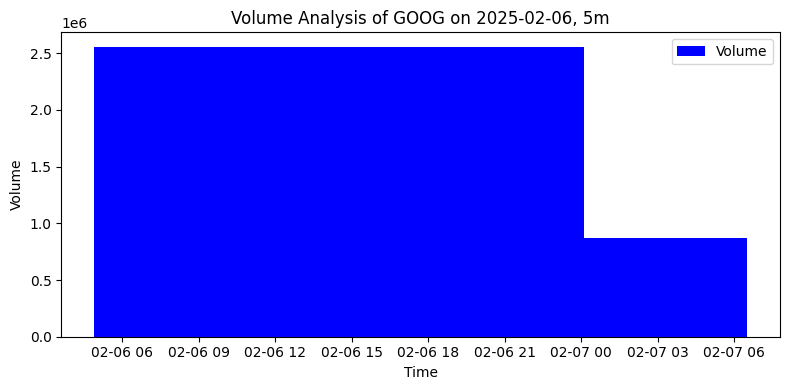

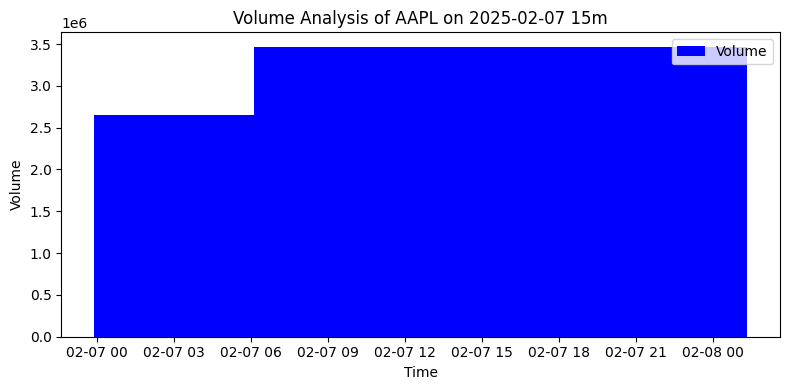

In [ ]:
# I am using predownloaded data from Question 1
volume_analysis(data1, "GOOG", "2025-02-06,", "5m")
volume_analysis(data2, "AAPL", "2025-02-07", "15m")


In [110]:
def price_analysis(data, ticker, date, interval):
    mean_prices = data[["Close", "High", "Low", "Open"]].mean(axis=1)

    fig = plt.figure(figsize= (12,6))
    plt.plot(data.index, mean_prices, color="red", label= "Average Price")
    plt.plot(data.index, data["Close"], color="blue", label="Close", alpha=0.5)

    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.title(f"Price Analysis for {ticker} on {date} {interval}")
    plt.grid()
    plt.show()
    


    return 


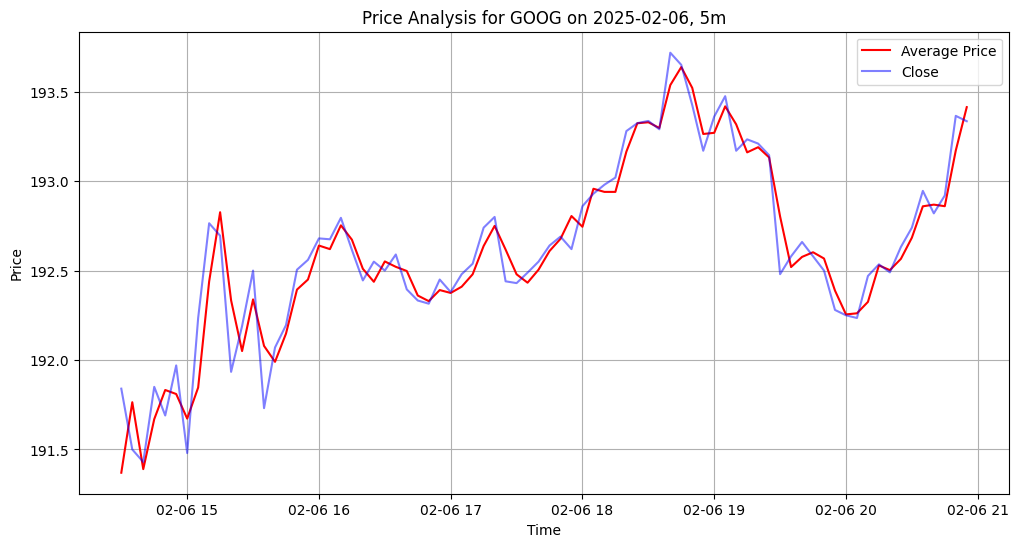

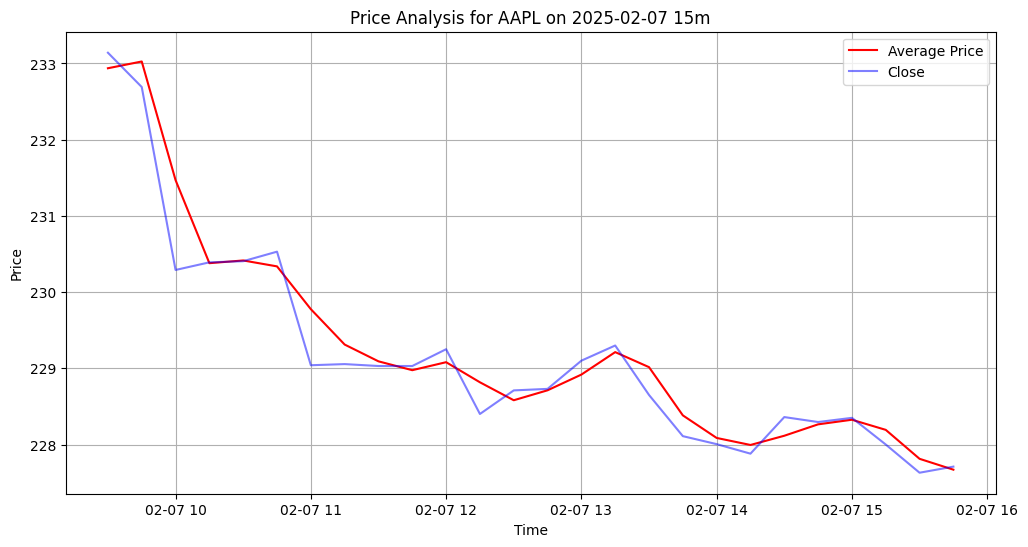

In [ ]:
# I am using predownloaded data from Question 1
price_analysis(data1, "GOOG", "2025-02-06,", "5m")
price_analysis(data2, "AAPL", "2025-02-07", "15m")



In [112]:
def violin_plots(data, ticker, date, interval):

    fig = plt.figure(figsize=(8, 5))  

    price_columns = ["Close", "Open", "Low", "High"]
    
    price_data = [data[col].squeeze() for col in price_columns]

    positions = [1,2,3,4]

    plt.violinplot(price_data, positions=positions, widths=0.7) 

    plt.xticks(positions, price_columns)  

    plt.title(f"Violin Plot of {ticker} Prices on {date} ({interval})")
    plt.ylabel("Price")

    plt.grid()
    plt.show()
    return 

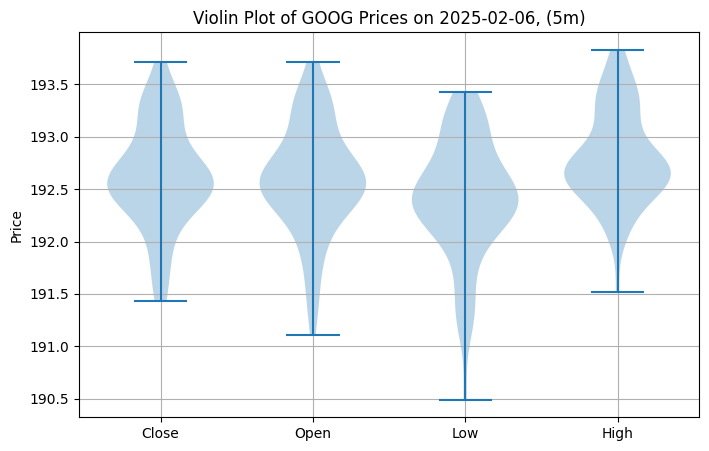

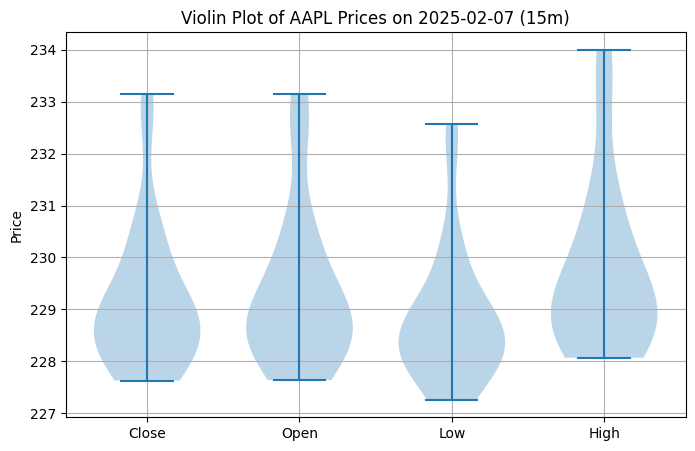

In [ ]:
# I am using predownloaded data from Question 1
violin_plots(data1, "GOOG", "2025-02-06,", "5m")
violin_plots(data2, "AAPL", "2025-02-07", "15m")

